In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

## Data import

In [2]:
array = np.genfromtxt('input.txt', delimiter=1, dtype=int)

## Part 1

In [3]:
low = np.ones_like(array)

ar1 = array[1:,:] < np.roll(array, 1, axis=0)[1:,:]
ar2 = array[:-1,:] < np.roll(array, -1, axis=0)[:-1,:]
ar3 = array[:,1:] < np.roll(array, 1, axis=1)[:,1:]
ar4 = array[:,:-1] < np.roll(array, -1, axis=1)[:,:-1]

low[1:,:] = np.logical_and(low[1:,:], ar1)
low[:-1,:] = np.logical_and(low[:-1,:], ar2)
low[:,1:] = np.logical_and(low[:,1:], ar3)
low[:,:-1] = np.logical_and(low[:,:-1], ar4)

print(f'Part 1: {np.sum(array*low) + np.sum(low)}')

Part 1: 452


## Part 2

In [4]:
labels = measure.label(array<9, connectivity=1)
basins = [np.sum(labels==i) for i in range(1,np.max(labels)+1)]
print(f'part 2: {np.prod(np.sort(basins)[-3:])}')

part 2: 1263735


## plots

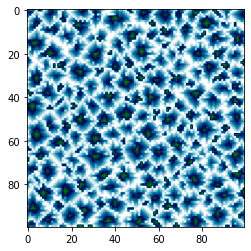

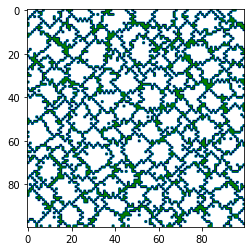

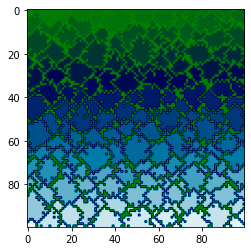

In [5]:
plt.figure(1)
plt.imshow(array, cmap='ocean')
plt.figure(2)
plt.imshow(array<9, cmap='ocean')
plt.figure(3)
plt.imshow(labels, cmap='ocean')